# MLP w TensorFlow



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Momentum optimization
```python
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)
```

# Nesterov Accelerated Gradient

```python
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9, use_nesterov=True)
```

# AdaGrad
```python
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
```

# RMSProp
```python
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate,
                                      momentum=0.9, decay=0.9, epsilon=1e-10)
```

# Adam Optimization
```python
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
```

In [2]:
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [3]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu, kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu, kernel_initializer=he_init)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss") 
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)  
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, tf.argmax(y, 1), 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))   
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
n_epochs = 20
batch_size = 64

array_acc_test_g = []
array_acc_test_adam=[]

In [6]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(mnist.train.num_examples // batch_size):
            print("\r{}%".format(100 * batch_index //  (mnist.train.num_examples // batch_size) ), end="")
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(" ", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)   
        array_acc_test_g.append(acc_test)

99%  0 Train accuracy: 0.90625 Test accuracy: 0.8983
99%  1 Train accuracy: 0.890625 Test accuracy: 0.9183
99%  2 Train accuracy: 0.953125 Test accuracy: 0.9269
99%  3 Train accuracy: 0.953125 Test accuracy: 0.9335
99%  4 Train accuracy: 0.96875 Test accuracy: 0.9391
99%  5 Train accuracy: 0.953125 Test accuracy: 0.9429
99%  6 Train accuracy: 0.96875 Test accuracy: 0.9447
99%  7 Train accuracy: 0.90625 Test accuracy: 0.9495
99%  8 Train accuracy: 0.953125 Test accuracy: 0.9514
99%  9 Train accuracy: 0.984375 Test accuracy: 0.9532
99%  10 Train accuracy: 1.0 Test accuracy: 0.9546
99%  11 Train accuracy: 0.953125 Test accuracy: 0.958
99%  12 Train accuracy: 0.96875 Test accuracy: 0.9572
99%  13 Train accuracy: 1.0 Test accuracy: 0.959
99%  14 Train accuracy: 1.0 Test accuracy: 0.9615
99%  15 Train accuracy: 0.984375 Test accuracy: 0.9622
99%  16 Train accuracy: 1.0 Test accuracy: 0.9645
99%  17 Train accuracy: 0.984375 Test accuracy: 0.9662
99%  18 Train accuracy: 0.96875 Test accuracy: 

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu, kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu, kernel_initializer=he_init)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss") 
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)  
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, tf.argmax(y, 1), 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))   
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [8]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(mnist.train.num_examples // batch_size):
            print("\r{}%".format(100 * batch_index //  (mnist.train.num_examples // batch_size) ), end="")
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(" ", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)   
        array_acc_test_adam.append(acc_test)

99%  0 Train accuracy: 0.9375 Test accuracy: 0.9549
99%  1 Train accuracy: 1.0 Test accuracy: 0.9538
99%  2 Train accuracy: 1.0 Test accuracy: 0.9659
99%  3 Train accuracy: 0.984375 Test accuracy: 0.9652
99%  4 Train accuracy: 1.0 Test accuracy: 0.9631
99%  5 Train accuracy: 0.96875 Test accuracy: 0.9684
99%  6 Train accuracy: 0.984375 Test accuracy: 0.9687
99%  7 Train accuracy: 0.984375 Test accuracy: 0.9683
99%  8 Train accuracy: 0.984375 Test accuracy: 0.9645
99%  9 Train accuracy: 0.984375 Test accuracy: 0.97
99%  10 Train accuracy: 1.0 Test accuracy: 0.9704
99%  11 Train accuracy: 0.984375 Test accuracy: 0.9676
99%  12 Train accuracy: 1.0 Test accuracy: 0.9711
99%  13 Train accuracy: 1.0 Test accuracy: 0.9688
99%  14 Train accuracy: 1.0 Test accuracy: 0.9733
99%  15 Train accuracy: 0.984375 Test accuracy: 0.9712
99%  16 Train accuracy: 0.984375 Test accuracy: 0.9716
99%  17 Train accuracy: 0.96875 Test accuracy: 0.9707
99%  18 Train accuracy: 0.984375 Test accuracy: 0.972
99%  19

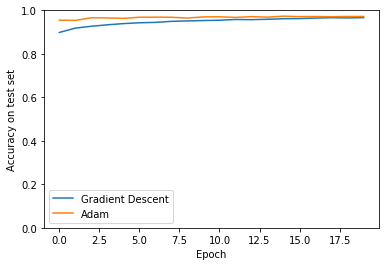

In [9]:
plt.figure()
plt.plot(array_acc_test_g, label='Gradient Descent')
plt.plot(array_acc_test_adam, label='Adam')
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy on test set')
plt.legend()
plt.show()